<a href="https://colab.research.google.com/github/Shaif95/AICamp_DS/blob/main/Stock_Viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mplfinance


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 5.1 MB/s eta 0:00:00


In [ ]:
import matplotlib as mpl
import pandas as pd
import yfinance as yf


def get_stock_data(ticker, start_date, end_date):
    stock = yf.download(ticker, start=start_date, end=end_date)
    stock.reset_index(inplace=True)  # Reset index to get separate "Date" column
    return stock

# Example usage:
start_date = '2022-01-01'
end_date = '2023-07-01'
ticker = 'AAPL'
stock_data = get_stock_data(ticker, start_date, end_date)
stock_data

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,177.830002,182.880005,177.710007,182.009995,180.434280,104487900
1,2022-01-04,182.630005,182.940002,179.119995,179.699997,178.144287,99310400
2,2022-01-05,179.610001,180.169998,174.639999,174.919998,173.405685,94537600
3,2022-01-06,172.699997,175.300003,171.639999,172.000000,170.510971,96904000
4,2022-01-07,172.889999,174.139999,171.029999,172.169998,170.679474,86709100
...,...,...,...,...,...,...,...
370,2023-06-26,186.830002,188.050003,185.229996,185.270004,185.270004,48088700
371,2023-06-27,185.889999,188.389999,185.669998,188.059998,188.059998,50730800
372,2023-06-28,187.929993,189.899994,187.600006,189.250000,189.250000,51216800
373,2023-06-29,189.080002,190.070007,188.940002,189.589996,189.589996,46347300


[*********************100%***********************]  1 of 1 completed


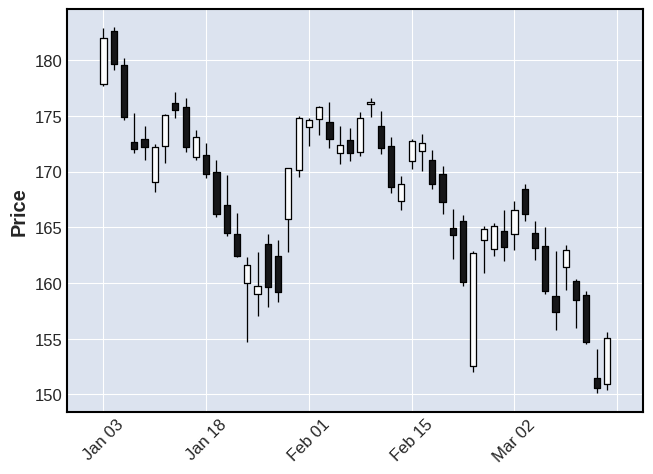

In [ ]:
import matplotlib.pyplot as plt
import mplfinance as mpf

df = yf.download(ticker, start=start_date, end=end_date).head(50)
df.index.name = 'Date'
# Create the candlestick chart
mpf.plot(df,type='candle')


# Set the axis labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('AAPL')

# Show the chart
plt.show()


In [ ]:
def get_candle_chart(df):
  fig = go.Figure(data=[go.Candlestick(x=df['Date'].head(75),
                open=df['Open'].head(75),
                high=df['High'].head(75),
                low=df['Low'].head(75),
                close=df['Close'].head(75))])
  fig.show()

start_date = '2023-01-01'
end_date = '2023-07-01'
ticker = 'AMZN'
stock_data = get_stock_data(ticker, start_date, end_date)
get_candle_chart(stock_data)

[*********************100%***********************]  1 of 1 completed


In [ ]:
import plotly.express as px

def get_line_plot(df):
  fig = px.line(df, x = 'Date', y = 'Open', title = 'Open Price')
  fig.show()

get_line_plot(stock_data)

In [ ]:
import plotly.express as px

def get_bar_chart(df):
  fig = px.bar(df, x = 'Date', y = 'Volume', title = 'Volume Traded')
  fig.show()

get_bar_chart(stock_data)

In [ ]:
import matplotlib.pyplot as plt
def get_pie_chart(data):
  data['Change'] = data['Open'] - data['Close'].shift(1)
  data = data.dropna().reset_index(drop=True, inplace=True)
  data['Movement'] = data['Change'].apply(lambda x : 'Up' if x > 0 else 'Down')
  plt.pie(data['Movement'].value_counts(), labels=data['Movement'].unique())
  plt.show()

<ipython-input-6-85ede594da00>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



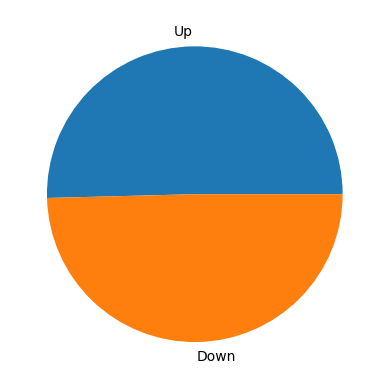

In [ ]:
get_pie_chart(stock_data)

[*********************100%***********************]  1 of 1 completed


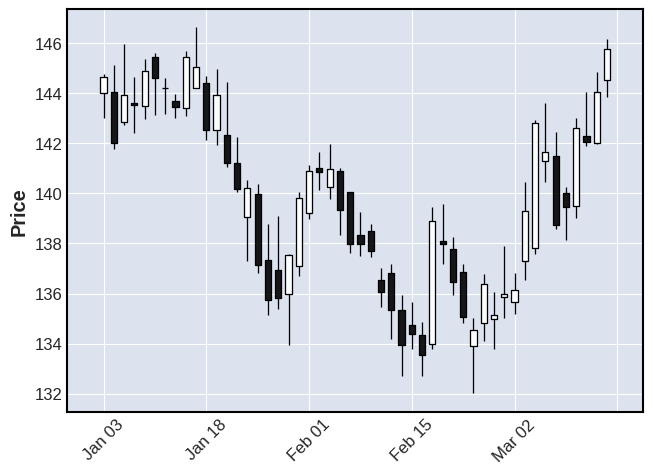

In [71]:
import matplotlib.pyplot as plt
import mplfinance as mpf
start_date = '2022-01-01'
end_date = '2023-07-01'
ticker = 'WMT'
df = yf.download(ticker, start=start_date, end=end_date).head(50)
df.index.name = 'Date'
# Create the candlestick chart
mpf.plot(df,type='candle')


# Set the axis labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title(ticker)

# Show the chart
plt.show()


[*********************100%***********************]  1 of 1 completed


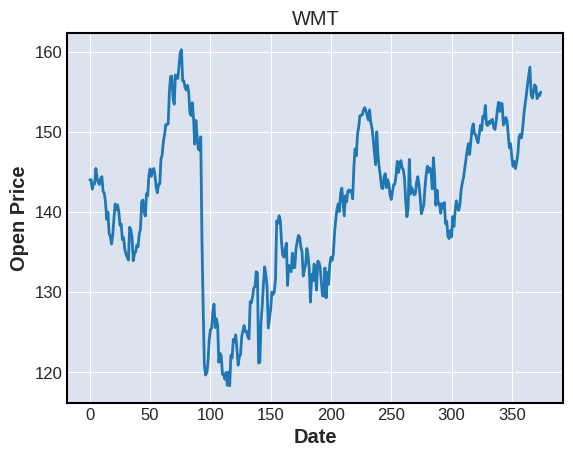

In [72]:
df = yf.download(ticker, start=start_date, end=end_date)
df.reset_index(inplace=True)  # Reset index to get separate "Date" column
open_prices = df['Open']

# Create the line chart
plt.plot(open_prices)

# Set the x-axis label, y-axis label, and title
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title(ticker)

# Show the chart
plt.show()

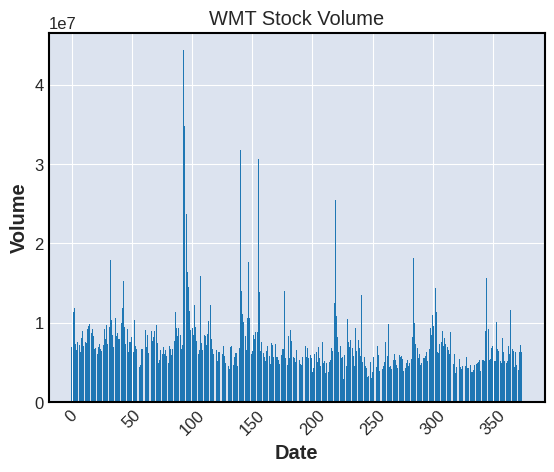

In [73]:
volume = df['Volume']

# Create the bar chart
plt.bar(volume.index, volume)

# Set the x-axis label, y-axis label, and title
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title(ticker+' Stock Volume')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the chart
plt.show()

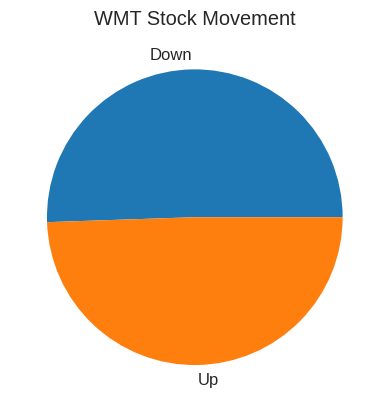

In [74]:
import matplotlib.pyplot as plt
data = df
data['Change'] = data['Open'] - data['Close'].shift(1)
data = data.dropna().reset_index(drop=True)
data['Movement'] = data['Change'].apply(lambda x: 'Up' if x > 0 else 'Down')

plt.pie(data['Movement'].value_counts(), labels=data['Movement'].unique())
plt.title(ticker+' Stock Movement')
plt.show()
